In [249]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.special import factorial
import  math

In [251]:
iterations = 100
n = 10000

In [257]:
def get_estimated_param_unif(arr, k):
    x = np.sum(arr ** k) / n
    est_param = ((k+1)*x) ** (1.0 / k)
    return est_param

In [322]:
def get_estimated_param_exp(arr, k):
    x = np.sum(arr ** k) / n
    est_param = (x / np.math.factorial(k)) ** (1.0 / k)
    return est_param

In [323]:
def calc_dev_unif_param(param, k):
    unif_param_deviations = np.zeros(k)
    for _ in range(iterations): 
        sample = np.random.uniform(0, param, n)
        for cur_k in range(1, k+1):
            calc_theta = get_estimated_param_unif(sample, cur_k)
            unif_param_deviations[cur_k - 1] += ((calc_theta - param) ** 2) / iterations
    return np.sqrt(unif_param_deviations)

In [324]:
def calc_dev_exp_param(param, k):
    exp_param_deviations = np.zeros(k)
    for _ in range(iterations):
        sample = np.random.exponential(1.0 / param, n)
        for i in range(1, k+1):
            est_param = get_estimated_param_exp(sample, i)
            exp_param_deviations[i-1] += ((est_param - param) ** 2) / iterations
    return np.sqrt(exp_param_deviations)

In [343]:
def plot_results(param, k):
    t = np.linspace(1, k+1, k)
    unif_param_dev = calc_dev_unif_param(param, k)
    exp_param_dev = calc_dev_exp_param(param, k)
    fig1 = plt.subplot(221)
    fig1.plot(t, unif_param_dev)
    fig1.title.set_text('uniform destribution')
    fig2 = plt.subplot(222)
    fig2.plot(t, exp_param_dev)
    fig2.title.set_text('exponential destribution')
    plt.show()

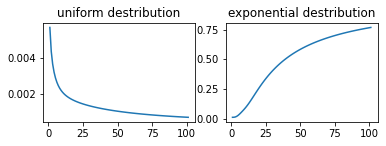

In [344]:
plot_results(1, 100)

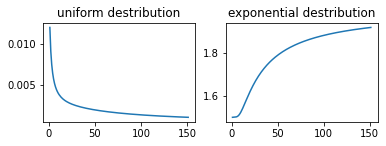

In [345]:
plot_results(2, 150)